<a href="https://colab.research.google.com/github/huihuiwuwu/Github-Colab/blob/main/0802_%ED%86%A0%ED%94%BD_%EB%B6%84%EC%84%9D_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 토큰화된 데이터 = "tokenize(mecab_noun)_words"

In [1]:
import tensorflow as tf
import os

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

In [2]:
strategy = tf.distribute.TPUStrategy(resolver)

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import site
import os
import pandas as pd
import re
from tqdm import tqdm

In [ ]:
!pip install pyLDAvis

In [7]:
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from gensim import corpora
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.gensim_models
import gensim

In [8]:
# mecab로 1보다 큰 명사만 추출된 파일 불어오기
data=pd.read_csv('/content/drive/MyDrive/졸업논문/AI Media/tokenize(mecab_noun)_words.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
data[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Contents,ProcessedData
0,전산망 ‘먹통’ 사고가 또 났다. 지난 30일 서울 강남고속버스터미널 버스표 발권 ...,"['전산망', '먹통', '사고', '강남', '고속버스', '터미널', '버스표'..."
1,‘IT 강국 대한민국’이지만 첨단 IT를 활용한 법률서비스인 ‘리걸테크 산업’은 걸...,"['강국', '대한민국', '첨단', '활용', '법률', '서비스', '리걸', ..."
2,살아있는 동물처럼 네 다리로 걷고 계단과 비탈길에서 자유자재로 움직이는 로봇을 제조...,"['동물', '다리', '계단', '비탈길', '자유자재', '제조', '보스턴',..."
3,대전 동구 역세권지구에 한국기상산업기술원 이전이 가시화되면서 '기상산업 클러스터' ...,"['대전', '동구', '역세', '지구', '한국', '기상', '산업', '기술..."
4,국내 데이터 네트워크 인공지능(AI) 생태계가 급성장하며 SW AI 역량을 갖춘 이...,"['국내', '데이터', '네트워크', '인공지능', '생태', '급성장', '역량..."


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
data.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320049 entries, 0 to 1320048
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Contents       1320049 non-null  object
 1   ProcessedData  1320049 non-null  object
dtypes: object(2)
memory usage: 20.1+ MB


In [11]:
AI=pd.read_csv('/content/drive/MyDrive/졸업논문/AI Media/AI.csv')
Media=pd.read_csv('/content/drive/MyDrive/졸업논문/AI Media/media.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
print(len(AI))
print(len(Media))

83751
48253


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
AI.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,x
83746,83747,"""2040년 '개교 100주년'을 향한 힘찬 날갯짓을 멈추지 않겠습니다."" \n\n..."
83747,83748,[천안]남서울대학교 김의명 드론공간정보공학과 교수와 임상병리학과 이동하 교수가 지난...
83748,83749,현대자동차가 신입 상시채용 제도에 지원자의 편의성을 높일 새로운 공고 게시 방식을 ...
83749,83750,한밭대 컴퓨터공학과에 재학 중인 김민준 씨가 한국장학재단에서 수여하는 '대통령과학장...
83750,83751,KT가 'KT Bridge Lab 대전센터' 개소로 대전ㆍ충청권 유망 스타트업 발굴...


In [50]:
selected_data_AI = data.head(83751)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
selected_data_AI.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Contents,ProcessedData
0,전산망 ‘먹통’ 사고가 또 났다. 지난 30일 서울 강남고속버스터미널 버스표 발권 ...,"['전산망', '먹통', '사고', '강남', '고속버스', '터미널', '버스표'..."
1,‘IT 강국 대한민국’이지만 첨단 IT를 활용한 법률서비스인 ‘리걸테크 산업’은 걸...,"['강국', '대한민국', '첨단', '활용', '법률', '서비스', '리걸', ..."
2,살아있는 동물처럼 네 다리로 걷고 계단과 비탈길에서 자유자재로 움직이는 로봇을 제조...,"['동물', '다리', '계단', '비탈길', '자유자재', '제조', '보스턴',..."
3,대전 동구 역세권지구에 한국기상산업기술원 이전이 가시화되면서 '기상산업 클러스터' ...,"['대전', '동구', '역세', '지구', '한국', '기상', '산업', '기술..."
4,국내 데이터 네트워크 인공지능(AI) 생태계가 급성장하며 SW AI 역량을 갖춘 이...,"['국내', '데이터', '네트워크', '인공지능', '생태', '급성장', '역량..."


In [52]:
selected_data_AI.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Contents,ProcessedData
83746,"""2040년 '개교 100주년'을 향한 힘찬 날갯짓을 멈추지 않겠습니다."" \n\n...","['개교', '주년', '날갯짓', '효인', '대전', '학기', '술대', '총..."
83747,[천안]남서울대학교 김의명 드론공간정보공학과 교수와 임상병리학과 이동하 교수가 지난...,"['천안', '서울', '대학교', '김의명', '드론', '공간', '정보', '..."
83748,현대자동차가 신입 상시채용 제도에 지원자의 편의성을 높일 새로운 공고 게시 방식을 ...,"['현대', '자동차', '신입', '시채', '제도', '지원자', '편의', '..."
83749,한밭대 컴퓨터공학과에 재학 중인 김민준 씨가 한국장학재단에서 수여하는 '대통령과학장...,"['한밭', '컴퓨터', '공학', '재학', '김민준', '한국장학재단', '수여..."
83750,KT가 'KT Bridge Lab 대전센터' 개소로 대전ㆍ충청권 유망 스타트업 발굴...,"['대전', '센터', '개소', '대전', '유망', '스타트업', '발굴', '..."


In [53]:
AI_data = selected_data_AI

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
AI_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83751 entries, 0 to 83750
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Contents       83751 non-null  object
 1   ProcessedData  83751 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
AI_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Contents,ProcessedData
0,전산망 ‘먹통’ 사고가 또 났다. 지난 30일 서울 강남고속버스터미널 버스표 발권 ...,"['전산망', '먹통', '사고', '강남', '고속버스', '터미널', '버스표'..."
1,‘IT 강국 대한민국’이지만 첨단 IT를 활용한 법률서비스인 ‘리걸테크 산업’은 걸...,"['강국', '대한민국', '첨단', '활용', '법률', '서비스', '리걸', ..."
2,살아있는 동물처럼 네 다리로 걷고 계단과 비탈길에서 자유자재로 움직이는 로봇을 제조...,"['동물', '다리', '계단', '비탈길', '자유자재', '제조', '보스턴',..."
3,대전 동구 역세권지구에 한국기상산업기술원 이전이 가시화되면서 '기상산업 클러스터' ...,"['대전', '동구', '역세', '지구', '한국', '기상', '산업', '기술..."
4,국내 데이터 네트워크 인공지능(AI) 생태계가 급성장하며 SW AI 역량을 갖춘 이...,"['국내', '데이터', '네트워크', '인공지능', '생태', '급성장', '역량..."


In [32]:
# 토픽 모델링
# 1. 최적의 토픽 수 계산
coherence_values = []
model_list = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    for num_topics in range(start, limit, step):
#         model = pyLDAvis.gensim_models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
#         model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
def find_optimal_number_of_topics(dictionary, corpus, processed_data, limit=8):
    start = 1;
    step = 1;

    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')

    dic = { coherence_values:x for x, coherence_values in zip(x, coherence_values) }

    plt.text(dic[max(coherence_values)],min(coherence_values),
             str(dic[max(coherence_values)]) + ' at MAX',
             color='r',
             horizontalalignment='center',
             verticalalignment='bottom')

    plt.show()

    return dic[max(coherence_values)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
# 상위 1,000개의 단어를 보존
TARGET_COL = "contents"
PROCESSED_COL = "ProcessedData"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000)
X = vectorizer.fit_transform(AI_data[PROCESSED_COL])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [60]:
import ast

# 将字符串形式的列表转化为真正的列表
AI_data['ProcessedData'] = AI_data['ProcessedData'].apply(ast.literal_eval)

# 然后创建字典
dictionary = corpora.Dictionary(AI_data['ProcessedData'])

# 创建词袋模型
corpus = [dictionary.doc2bow(text) for text in AI_data['ProcessedData']]

# 将ProcessedData列转化为列表
processed_data = AI_data['ProcessedData'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


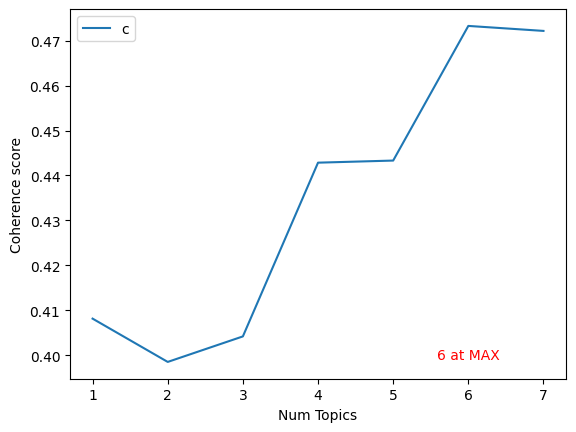

In [71]:
limit = 8
NUM_TOPICS = find_optimal_number_of_topics(dictionary, corpus, processed_data, limit)

In [61]:
# LDA모델 생성
lda_model = LatentDirichletAllocation(n_components=6, learning_method='online', random_state=42, max_iter=1)
lda_top = lda_model.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
# 단어 집합. 1,000개의 단어가 저장됨.
terms = vectorizer.get_feature_names_out()

def get_topics(components, feature_names, n=20):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
AI_topics6_mecab_noun=get_topics(lda_model.components_,terms)

Topic 1: [('산업', 1503.52), ('사업', 1362.74), ('기술', 1315.79), ('지원', 937.5), ('과학', 913.27), ('혁신', 888.52), ('정부', 879.74), ('기업', 868.88), ('정보', 782.26), ('한국', 772.13), ('디지털', 744.26), ('경제', 726.46), ('선정', 723.54), ('분야', 689.54), ('미래', 678.97), ('반도체', 618.4), ('추진', 608.33), ('지역', 603.92), ('인공지능', 580.3), ('개최', 571.88)]
Topic 2: [('교육', 1490.32), ('대통령', 1130.72), ('윤석열', 834.18), ('후보', 657.93), ('학생', 608.19), ('대학', 582.88), ('교육감', 573.28), ('교수', 496.92), ('학교', 481.41), ('국민', 478.27), ('과정', 419.08), ('선거', 412.97), ('교육청', 383.55), ('대학교', 367.58), ('광주', 353.2), ('기자', 340.46), ('공약', 318.58), ('학과', 309.16), ('방송', 302.88), ('프로그램', 290.43)]
Topic 3: [('투자', 1262.95), ('미국', 758.05), ('스타트업', 625.73), ('중국', 572.76), ('반도체', 486.66), ('기업', 485.05), ('금융', 480.1), ('뉴스', 439.17), ('일본', 415.04), ('기사', 378.94), ('규모', 363.76), ('인간', 329.22), ('인수', 326.0), ('그룹', 313.36), ('글로벌', 296.8), ('유치', 290.94), ('펀드', 279.72), ('벤처', 275.61), ('시장', 274.45), ('자산', 262.2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
def get_topics2(components, terms):
    topics = []
    for topic_idx, topic in enumerate(components):
        topic_terms = [(terms[i], topic[i]) for i in topic.argsort()[:-20 - 1:-1]]
        topics.append((topic_idx, topic_terms))
    return topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [67]:
AI_topics = get_topics2(lda_model.components_, terms)
if AI_topics is not None:
    df = pd.DataFrame(AI_topics, columns=['Topic', 'Terms'])
else:
    df = pd.DataFrame()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [68]:
# print(type(AI_topics))

<class 'list'>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
AI_topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('산업', 1503.521821736712),
   ('사업', 1362.7389645557164),
   ('기술', 1315.7883290901966),
   ('지원', 937.4970146277542),
   ('과학', 913.2727554766263),
   ('혁신', 888.5224130850409),
   ('정부', 879.7404631239724),
   ('기업', 868.875532313342),
   ('정보', 782.2581699561559),
   ('한국', 772.1332367688574),
   ('디지털', 744.2627848360949),
   ('경제', 726.4605201645212),
   ('선정', 723.5437757631855),
   ('분야', 689.54276684662),
   ('미래', 678.9699684948592),
   ('반도체', 618.4047611637302),
   ('추진', 608.3263835471216),
   ('지역', 603.9233438247836),
   ('인공지능', 580.2966949713148),
   ('개최', 571.8827508332336)]),
 (1,
  [('교육', 1490.317912380254),
   ('대통령', 1130.7226597676358),
   ('윤석열', 834.1846063777936),
   ('후보', 657.9268506911126),
   ('학생', 608.1903704146148),
   ('대학', 582.8795009137601),
   ('교육감', 573.280040214869),
   ('교수', 496.91626283370283),
   ('학교', 481.4056041808638),
   ('국민', 478.26589858246615),
   ('과정', 419.0816262053069),
   ('선거', 412.97149385278516),
   ('교육청', 383.5530

In [70]:
# 首先，我们把 topics 转换成更容易处理的形式
topics_transformed = [(topic[0], word, value) for topic in AI_topics for word, value in topic[1]]

# 然后我们把转换后的列表变成 DataFrame
df = pd.DataFrame(topics_transformed, columns=['Topic', 'Word', 'Value'])

# 最后，我们可以把 DataFrame 保存为 CSV 或 Excel 文件
df.to_csv('/content/drive/MyDrive/졸업논문/AI Media/토픽분석_결과/AI_topics.csv',index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
